In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\task5\US_Accidents_June20.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [5]:
df.shape

(3513617, 49)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

In [7]:
len(df)

3513617

In [8]:
Missing_percentages = df.isnull().sum().sort_values(ascending = False)/ len(df)
Missing_percentages

End_Lng                  7.054890e-01
End_Lat                  7.054890e-01
Number                   6.440269e-01
Precipitation(in)        5.765779e-01
Wind_Chill(F)            5.317167e-01
TMC                      2.945110e-01
Wind_Speed(mph)          1.293849e-01
Weather_Condition        2.166941e-02
Visibility(mi)           2.158915e-02
Humidity(%)              1.983341e-02
Temperature(F)           1.870779e-02
Wind_Direction           1.675595e-02
Pressure(in)             1.590441e-02
Weather_Timestamp        1.233003e-02
Airport_Code             1.923374e-03
Timezone                 1.104275e-03
Zipcode                  3.042449e-04
Sunrise_Sunset           3.272981e-05
Civil_Twilight           3.272981e-05
Nautical_Twilight        3.272981e-05
Astronomical_Twilight    3.272981e-05
City                     3.187598e-05
Description              2.846070e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Severity                 0.000000e+00
Start_Time  

<AxesSubplot:>

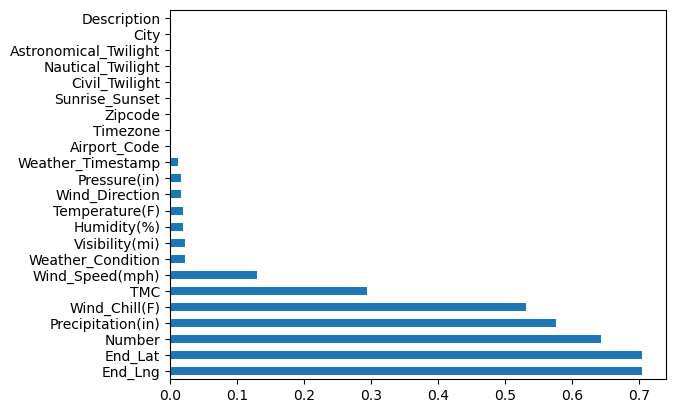

In [9]:
Missing_percentages[Missing_percentages !=0].plot(kind = 'barh')

In [10]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Exploratary Data analysis of Columns That I will analyze.

Distance(mi)

City

Start_Time

Start Lat & Start Long

Temperature

Weather Condition

In [11]:
cities = df['City'].unique()

In [12]:
len(cities)

11896

In [13]:

cities_by_accident= df['City'].value_counts()
cities_by_accident
     

Houston                         101240
Los Angeles                      79169
Charlotte                        78952
Dallas                           64790
Austin                           63889
                                 ...  
Dilley                               1
Dunnville                            1
Rock Hall                            1
Teachey                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11895, dtype: int64

<AxesSubplot:>

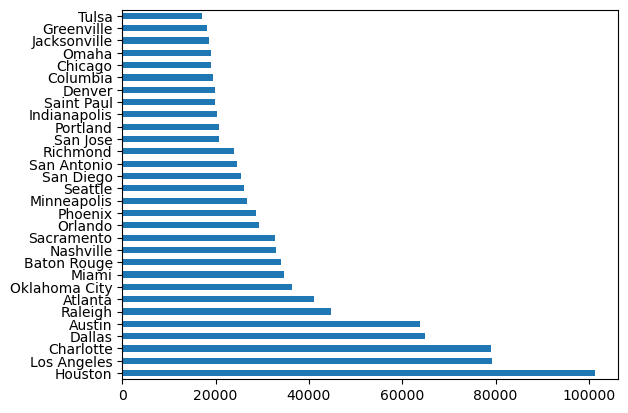

In [14]:
cities_by_accident[:30].plot(kind =  'barh')

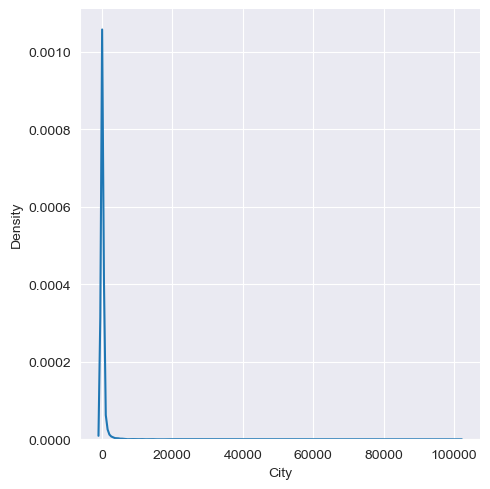

In [15]:
sns.set_style('darkgrid')

sns.displot(data = cities_by_accident, kind = 'kde')

In [16]:
High_accident_cities = cities_by_accident[cities_by_accident >= 1000]
Low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [17]:
len(High_accident_cities)/ len(cities)

0.049512441156691324

In [18]:
len(Low_accident_cities)/ len(cities)

0.9504034969737727

<AxesSubplot:xlabel='City', ylabel='Count'>

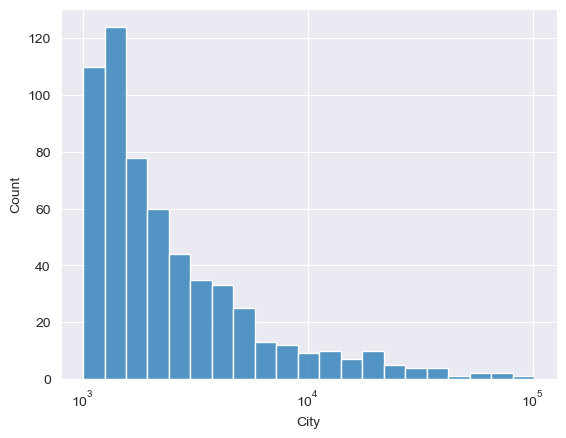

In [19]:
sns.histplot(High_accident_cities, log_scale = True)

In [20]:
len(cities_by_accident[cities_by_accident== 1])

1338

No data for Newyork

The Number of accidents per city dectreases exponentially

Less than 9% of cities have more than 1000 accidents per Year

286 cities having only one accident

In [21]:
df['Start_Time']

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
3513612    2019-08-23 18:03:25
3513613    2019-08-23 19:11:30
3513614    2019-08-23 19:00:21
3513615    2019-08-23 19:00:21
3513616    2019-08-23 18:52:06
Name: Start_Time, Length: 3513617, dtype: object

In [22]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

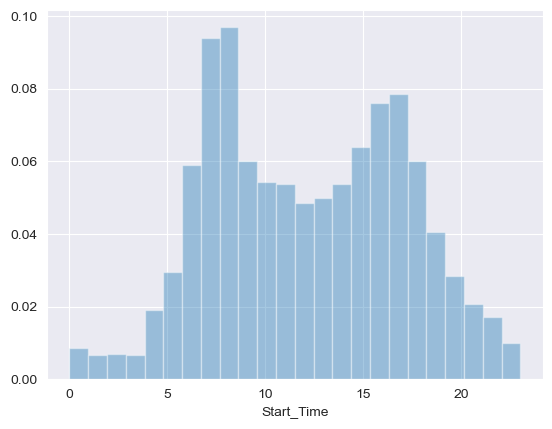

In [23]:
sns.distplot(df['Start_Time'].dt.hour, bins =24, kde = False, norm_hist=True)

A high percrntage of accidents occur around 6 to 10 am, (probally people in a hurry to get ot work.)

Next Highest percentage of accidents occur around 3 to 6 pm

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

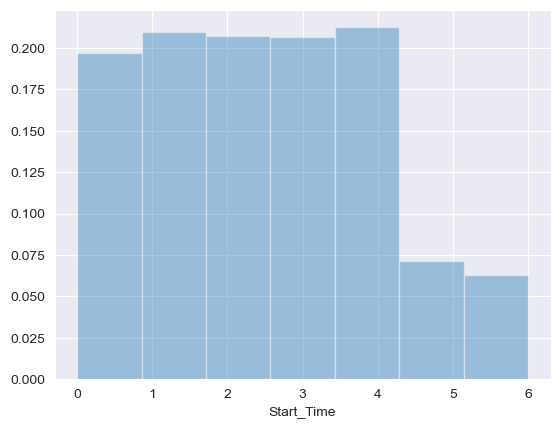

In [24]:
#monday-->0, sunday-->6
sns.distplot(df['Start_Time'].dt.dayofweek, bins =7, kde = False, norm_hist=True)

From this we can conclude that accidents are higher on week days as compare to weekends

In [27]:
sunday_start_time = df.Start_Time[df['Start_Time'].dt.dayofweek==6]
sunday_start_time

135       2016-02-14 10:13:00
136       2016-02-14 10:49:23
137       2016-02-14 10:41:57
138       2016-02-14 18:15:23
139       2016-02-14 19:17:01
                  ...        
3511363   2019-08-18 22:48:14
3511364   2019-08-18 23:24:10
3511478   2019-08-18 22:56:56
3511479   2019-08-18 22:56:56
3511518   2019-08-18 22:54:41
Name: Start_Time, Length: 189315, dtype: datetime64[ns]

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

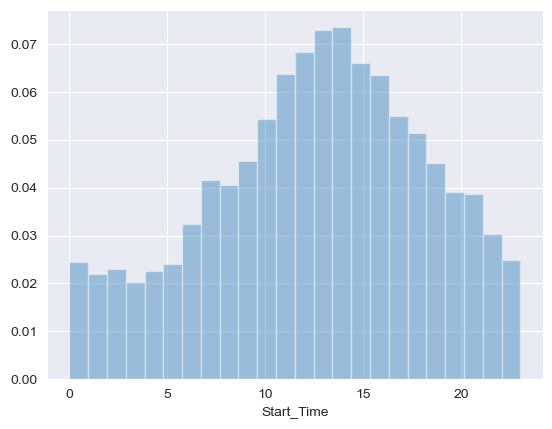

In [28]:
sns.distplot(sunday_start_time.dt.hour, bins =24, kde = False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

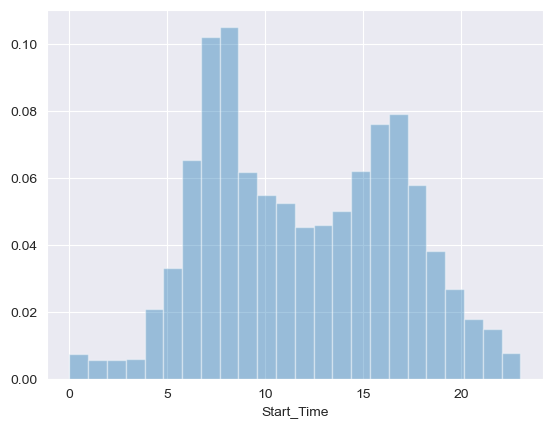

In [29]:
monday_start_time = df.Start_Time[df['Start_Time'].dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour, bins =24, kde = False, norm_hist=True)

On sundays mostly accidents oocur around 10am to 6pm unlike monday.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

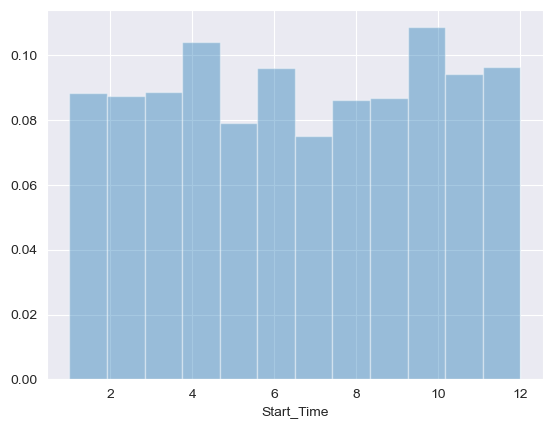

In [30]:
sns.distplot(monday_start_time.dt.month, bins =12, kde = False, norm_hist=True)

On month basis month accidents occur from Nov dec